In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


In [58]:
#zad 1
def checkDegree():
    pass
def checkC (graph, i):
    pass

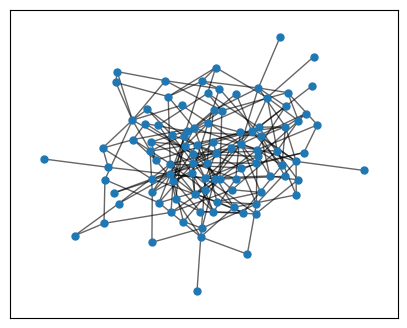

In [17]:
G = nx.erdos_renyi_graph(100, 0.05, seed=42)

fig = plt.figure(figsize=(5,4))


pos = nx.spring_layout(G, seed=10396953)
nx.draw_networkx_nodes(G,  pos = pos, node_size=25)
nx.draw_networkx_edges(G,  pos = pos, alpha=0.6)


In [87]:
#zad 1

def checkC (graph, k):

    listOfNodes = []
    sumOfI = 0
    counter = 0
    for node, degree in graph.degree():

        if (degree == k):
            listOfNodes.append(node)
            G_sub = nx.ego_graph(graph, node, radius = 1, center = False)
            i = checkSubGraph(G_sub)
            sumOfI += i
            counter += 1
    if counter != 0 :
        return sumOfI/counter
    else: 0
def checkSubGraph(graph):
    sum = 0 
    i = 0
    for node, degree in graph.degree():
        sum += degree
        i +=1
    if i != 0 :
        return sum/i
    else: return 0
    



    






In [86]:
for i in range (10):
    res = checkC(G,i+1)
    print(f'{i+1}: ')
    print(res)
    print(f'1/k: {1/(i+1)}')
    print(' ')

1: 
0.0
1/k: 1.0
 
2: 
0.0
1/k: 0.5
 
3: 
0.12698412698412698
1/k: 0.3333333333333333
 
4: 
0.14285714285714285
1/k: 0.25
 
5: 
0.2117647058823529
1/k: 0.2
 
6: 
0.18181818181818182
1/k: 0.16666666666666666
 
7: 
0.21428571428571427
1/k: 0.14285714285714285
 
8: 
0.3333333333333333
1/k: 0.125
 
9: 
0.3333333333333333
1/k: 0.1111111111111111
 
10: 
0.26666666666666666
1/k: 0.1
 


In [ ]:
#zad 3
agency = pd.read_csv("agency.txt")
agency.head()

,agency_id,agency_name,agency_url,agency_timezone,agency_phone,agency_lang
0,2,Zarząd Transportu Miejskiego w Warszawie,ztm.waw.pl,Europe/Warsaw,224594100.0,pl
1,5,Marszałek Województwa Mazowieckiego,NaN,Europe/Warsaw,NaN,pl


In [2]:
calendar = pd.read_csv("calendar.txt")
calendar.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,0_2,1,0,0,0,0,0,0,20251208,20251208
1,1_2,0,1,1,1,0,0,0,20251209,20251211
2,2_5,0,0,0,0,1,0,0,20251212,20251212
3,3_3,0,0,0,0,0,1,0,20251213,20251213
4,4_3,0,0,0,0,0,0,1,20251214,20251214


In [3]:
calendar_dates = pd.read_csv("calendar_dates.txt")
calendar_dates.head()

,service_id,date,exception_type


In [4]:
routes = pd.read_csv("routes.txt")
routes.head()

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type
0,0_A1,5,A1,NaN,WARSZAWA ŚRÓDMIEŚCIE WKD - Opacz-Kolonia/ - WK...,2
1,0_A12,5,A12,NaN,WARSZAWA ŚRÓDMIEŚCIE WKD - WKD/ - WKD MILANÓWE...,2
2,0_E-1,2,E-1,NaN,METRO STADION NARODOWY - Sokola - Zwycięzców -...,3
3,0_E-2,2,E-2,NaN,METRO RATUSZ ARSENAŁ - al. „Solidarności” - pl...,3
4,0_L-1,2,L-1,NaN,PIASECZNO PKP PIASECZNO - Piaseczno/Towarowa -...,3


In [ ]:
routes.describe()
# https://gtfs.org/documentation/schedule/reference/#routestxt
#0 - Tram, Streetcar, Light rail. Any light rail or street level system within a metropolitan area.
#1 - Subway, Metro. Any underground rail system within a metropolitan area.
#2 - Rail. Used for intercity or long-distance travel.
#3 - Bus. Used for short- and long-distance bus routes

,agency_id,route_long_name,route_type
count,2321.000000,0.0,2321.000000
mean,2.227488,NaN,2.679449
std,0.794346,NaN,0.823551
min,2.000000,NaN,0.000000
25%,2.000000,NaN,3.000000
50%,2.000000,NaN,3.000000
75%,2.000000,NaN,3.000000
max,5.000000,NaN,3.000000


In [90]:
routes['route_desc'][0]

'WARSZAWA ŚRÓDMIEŚCIE WKD - Opacz-Kolonia/ - WKD/ - WKD GRODZISK MAZOWIECKI RADOŃSKA|WKD MILANÓWEK GRUDÓW - Opacz-Kolonia/ - WARSZAWA ŚRÓDMIEŚCIE WKD|WKD GRODZISK MAZOWIECKI RADOŃSKA - WKD/ - Opacz-Kolonia/ - WARSZAWA ŚRÓDMIEŚCIE WKD'

In [91]:
shapes = pd.read_csv("shapes.txt")
shapes.head(10)

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,114225,52.334812,21.033368,0
1,114225,52.334939,21.033529,1
2,114225,52.335111,21.033500,2
3,114225,52.335183,21.032941,3
4,114225,52.334957,21.032927,4
5,114225,52.334677,21.032912,5
6,114225,52.333429,21.032794,6
7,114225,52.332182,21.032677,7
8,114225,52.330663,21.032368,8
9,114225,52.330175,21.032148,9


In [6]:
stop_times = pd.read_csv("stop_times.txt")
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint
0,0_2_4745094,06:04:00,06:04:00,2228,0,NaN,0,1,0.000,1
1,0_2_4745094,06:05:00,06:05:00,3552,1,NaN,0,0,0.317,1
2,0_2_4745094,06:06:00,06:06:00,2226,2,NaN,0,0,0.576,1
3,0_2_4745094,06:07:00,06:07:00,2239,3,NaN,0,0,0.936,1
4,0_2_4745094,06:09:00,06:09:00,2223,4,NaN,0,0,1.566,1


In [223]:
stops = pd.read_csv("stops.txt")
stops.loc[:,'stop_name'] = stops['stop_name'].str.lower()
stops.head(10)

,stop_id,stop_code,stop_name,stop_lat,stop_lon
0,2,02,włochy-ratusz,52.192628,20.960045
1,15,01,krakowiaków,52.184943,20.953668
2,24,01,orzechowa,52.191881,20.949257
3,26,01,przedpole,52.192768,20.944688
4,30,01,pkp wkd al. jerozolimskie,52.205760,20.943216
5,31,02,mikołajska,52.203003,20.928346
6,32,99,r11(k),52.196605,20.922746
7,35,02,techników,52.204673,20.923649
8,38,03,sympatyczna,52.210300,20.919860
9,40,02,parowcowa,52.212330,20.913890


In [93]:
trips = pd.read_csv("trips.txt")
trips.head(10)

,route_id,service_id,trip_id,trip_headsign,direction_id,shape_id
0,0_E-1,0_2,0_2_4745094,E-1 -> Metro Stadion Narodowy,1,271981
1,0_E-1,0_2,0_2_4745096,E-1 -> Metro Stadion Narodowy,1,271981
2,0_E-1,0_2,0_2_4745098,E-1 -> Metro Stadion Narodowy,1,271981
3,0_E-1,0_2,0_2_4745104,E-1 -> Metro Stadion Narodowy,1,271981
4,0_E-1,0_2,0_2_4745106,E-1 -> Metro Stadion Narodowy,1,271981
5,0_E-1,0_2,0_2_4745108,E-1 -> Metro Stadion Narodowy,1,271981
6,0_E-1,0_2,0_2_4745110,E-1 -> Metro Stadion Narodowy,1,271981
7,0_E-1,0_2,0_2_4745114,E-1 -> Metro Stadion Narodowy,1,271981
8,0_E-1,0_2,0_2_4745116,E-1 -> Metro Stadion Narodowy,1,271981
9,0_E-1,0_2,0_2_4745118,E-1 -> Metro Stadion Narodowy,1,271981


In [96]:
trips.tail()

,route_id,service_id,trip_id,trip_headsign,direction_id,shape_id
211399,6_900,6_2,6_2_4480194,900 -> Dom Samotnej Matki,0,254583
211400,6_900,6_2,6_2_4480196,900 -> Dom Samotnej Matki,0,254583
211401,6_900,6_2,6_2_4480198,900 -> Dom Samotnej Matki,0,254583
211402,6_900,6_2,6_2_4480200,900 -> Dom Samotnej Matki,0,254583
211403,6_900,6_2,6_2_4480202,900 -> Dom Samotnej Matki,0,254583


In [147]:
tramRoutes = routes.loc[routes['route_type']==0]
tramRoutes

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type
117,0_1,2,1,NaN,ANNOPOL - Annopol - Rembielińska - Matki Teresy z Kalkuty - Odrowąża - Starzyńskiego - most Gdański - Słomińskiego - Okopowa - Towarowa - Grójecka - al. Krakowska - P+R AL. KRAKOWSKA|P+R AL. KRAKOWSKA - Grójecka - Towarowa - Okopowa - Słomińskiego - most Gdański - Starzyńskiego - Odrowąża - Matki Teresy z Kalkuty - Rembielińska - Annopol - ANNOPOL,0
118,0_2,2,2,NaN,METRO MŁOCINY - Kasprowicza - Nocznickiego - Zgrupowania AK „Kampinos” - al. płk. Kuklińskiego - Trakt Nadwiślański - Światowida - WINNICA|WINNICA - Trakt Nadwiślański - al. płk. Kuklińskiego - Zgrupowania AK „Kampinos” - Kasprowicza - METRO MŁOCINY,0
119,0_3,2,3,NaN,ANNOPOL - Annopol - Rembielińska - Matki Teresy z Kalkuty - Odrowąża - 11 Listopada - Targowa - Zamoyskiego - Grochowska - GOCŁAWEK|GOCŁAWEK - Targowa - 11 Listopada - Odrowąża - Matki Teresy z Kalkuty - Rembielińska - Annopol - ANNOPOL,0
120,0_4,2,4,NaN,ŻERAŃ WSCHODNI - Rembielińska - Matki Teresy z Kalkuty - Odrowąża - 11 Listopada - al. „Solidarności” - pl. Bankowy - Marszałkowska - Puławska - WYŚCIGI|WYŚCIGI - Marszałkowska - pl. Konstytucji - Marszałkowska - pl. Bankowy - al. „Solidarności” - Targowa - 11 Listopada - Odrowąża - Matki Teresy z Kalkuty - Rembielińska - Annopol - ŻERAŃ WSCHODNI,0
121,0_6,2,6,NaN,METRO MŁOCINY - Nocznickiego - Zgrupowania AK „Kampinos” - Marymoncka - Słowackiego - Mickiewicza - Andersa - Międzyparkowa - Słomińskiego - most Gdański - Starzyńskiego - Jagiellońska - Targowa - Zamoyskiego - Grochowska - GOCŁAWEK|GOCŁAWEK - Targowa - Jagiellońska - Starzyńskiego - most Gdański - Słomińskiego - Międzyparkowa - Andersa - Mickiewicza - Słowackiego - Marymoncka - Zgrupowania AK „Kampinos” - Nocznickiego - METRO MŁOCINY,0
...,...,...,...,...,...,...
2119,6_26,2,26,NaN,METRO MŁOCINY - Nocznickiego - Kasprowicza - Nocznickiego - Wólczyńska - Broniewskiego - al. Reymonta - Powstańców Śląskich - Połczyńska - Wolska - al. „Solidarności” - Targowa - Zamoyskiego - Grochowska - rondo Wiatraczna - WIATRACZNA|WIATRACZNA - Grochowska - Targowa - al. „Solidarności” - Wolska - Połczyńska - Powstańców Śląskich - al. Reymonta - Wólczyńska - Nocznickiego - METRO MŁOCINY,0
2120,6_27,2,27,NaN,METRO MARYMONT - Słowackiego - ks. Popiełuszki - pl. Grunwaldzki - al. Jana Pawła II - Okopowa - al. „Solidarności” - Wolska - CM. WOLSKI|CM. WOLSKI - al. „Solidarności” - Okopowa - al. Jana Pawła II - pl. Grunwaldzki - ks. Popiełuszki - Słowackiego - METRO MARYMONT,0
2121,6_28,2,28,NaN,DW. WSCHODNI (KIJOWSKA) - Kijowska - Targowa - Jagiellońska - Starzyńskiego - most Gdański - Słomińskiego - al. Jana Pawła II - Broniewskiego - al. Reymonta - Powstańców Śląskich - Górczewska - OS. GÓRCZEWSKA|OS. GÓRCZEWSKA - Powstańców Śląskich - al. Reymonta - Broniewskiego - al. Jana Pawła II - Słomińskiego - most Gdański - Starzyńskiego - Jagiellońska - Targowa - Kijowska - DW. WSCHODNI (KIJOWSKA),0
2122,6_31,2,31,NaN,METRO WIERZBNO - Woronicza - Wołoska - Marynarska - PKP SŁUŻEWIEC|PKP SŁUŻEWIEC - Wołoska - Woronicza - METRO WIERZBNO,0


In [149]:
tramRoutes.loc[:, 'route_desc'] = tramRoutes['route_desc'].str.replace('|', ' - ').str.split(' - ')
tramRoutes.head()

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type
117,0_1,2,1,NaN,"[ANNOPOL, Annopol, Rembielińska, Matki Teresy z Kalkuty, Odrowąża, Starzyńskiego, most Gdański, Słomińskiego, Okopowa, Towarowa, Grójecka, al. Krakowska, P+R AL. KRAKOWSKA, P+R AL. KRAKOWSKA, Grójecka, Towarowa, Okopowa, Słomińskiego, most Gdański, Starzyńskiego, Odrowąża, Matki Teresy z Kalkuty, Rembielińska, Annopol, ANNOPOL]",0
118,0_2,2,2,NaN,"[METRO MŁOCINY, Kasprowicza, Nocznickiego, Zgrupowania AK „Kampinos”, al. płk. Kuklińskiego, Trakt Nadwiślański, Światowida, WINNICA, WINNICA, Trakt Nadwiślański, al. płk. Kuklińskiego, Zgrupowania AK „Kampinos”, Kasprowicza, METRO MŁOCINY]",0
119,0_3,2,3,NaN,"[ANNOPOL, Annopol, Rembielińska, Matki Teresy z Kalkuty, Odrowąża, 11 Listopada, Targowa, Zamoyskiego, Grochowska, GOCŁAWEK, GOCŁAWEK, Targowa, 11 Listopada, Odrowąża, Matki Teresy z Kalkuty, Rembielińska, Annopol, ANNOPOL]",0
120,0_4,2,4,NaN,"[ŻERAŃ WSCHODNI, Rembielińska, Matki Teresy z Kalkuty, Odrowąża, 11 Listopada, al. „Solidarności”, pl. Bankowy, Marszałkowska, Puławska, WYŚCIGI, WYŚCIGI, Marszałkowska, pl. Konstytucji, Marszałkowska, pl. Bankowy, al. „Solidarności”, Targowa, 11 Listopada, Odrowąża, Matki Teresy z Kalkuty, Rembielińska, Annopol, ŻERAŃ WSCHODNI]",0
121,0_6,2,6,NaN,"[METRO MŁOCINY, Nocznickiego, Zgrupowania AK „Kampinos”, Marymoncka, Słowackiego, Mickiewicza, Andersa, Międzyparkowa, Słomińskiego, most Gdański, Starzyńskiego, Jagiellońska, Targowa, Zamoyskiego, Grochowska, GOCŁAWEK, GOCŁAWEK, Targowa, Jagiellońska, Starzyńskiego, most Gdański, Słomińskiego, Międzyparkowa, Andersa, Mickiewicza, Słowackiego, Marymoncka, Zgrupowania AK „Kampinos”, Nocznickiego, METRO MŁOCINY]",0


In [156]:
trams6 = tramRoutes.loc[tramRoutes['route_short_name']=='6']
trams6

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type
121,0_6,2,6,NaN,"[METRO MŁOCINY, Nocznickiego, Zgrupowania AK „Kampinos”, Marymoncka, Słowackiego, Mickiewicza, Andersa, Międzyparkowa, Słomińskiego, most Gdański, Starzyńskiego, Jagiellońska, Targowa, Zamoyskiego, Grochowska, GOCŁAWEK, GOCŁAWEK, Targowa, Jagiellońska, Starzyńskiego, most Gdański, Słomińskiego, Międzyparkowa, Andersa, Mickiewicza, Słowackiego, Marymoncka, Zgrupowania AK „Kampinos”, Nocznickiego, METRO MŁOCINY]",0
461,1_6,2,6,NaN,"[METRO MŁOCINY, Nocznickiego, Zgrupowania AK „Kampinos”, Marymoncka, Słowackiego, Mickiewicza, Andersa, Międzyparkowa, Słomińskiego, most Gdański, Starzyńskiego, Jagiellońska, Targowa, Zamoyskiego, Grochowska, GOCŁAWEK, GOCŁAWEK, Targowa, Jagiellońska, Starzyńskiego, most Gdański, Słomińskiego, Międzyparkowa, Andersa, Mickiewicza, Słowackiego, Marymoncka, Zgrupowania AK „Kampinos”, Nocznickiego, METRO MŁOCINY]",0
802,2_6,2,6,NaN,"[METRO MŁOCINY, Nocznickiego, Zgrupowania AK „Kampinos”, Marymoncka, Słowackiego, Mickiewicza, Andersa, Międzyparkowa, Słomińskiego, most Gdański, Starzyńskiego, Jagiellońska, Targowa, Zamoyskiego, Grochowska, GOCŁAWEK, GOCŁAWEK, Targowa, Jagiellońska, Starzyńskiego, most Gdański, Słomińskiego, Międzyparkowa, Andersa, Mickiewicza, Słowackiego, Marymoncka, Zgrupowania AK „Kampinos”, Nocznickiego, METRO MŁOCINY]",0
1135,3_6,2,6,NaN,"[METRO MŁOCINY, Nocznickiego, Zgrupowania AK „Kampinos”, Marymoncka, Słowackiego, Mickiewicza, Andersa, Międzyparkowa, Słomińskiego, most Gdański, Starzyńskiego, Jagiellońska, Targowa, Zamoyskiego, Grochowska, GOCŁAWEK, GOCŁAWEK, Targowa, Jagiellońska, Starzyńskiego, most Gdański, Słomińskiego, Międzyparkowa, Andersa, Mickiewicza, Słowackiego, Marymoncka, Zgrupowania AK „Kampinos”, Nocznickiego, METRO MŁOCINY]",0
1442,4_6,2,6,NaN,"[METRO MŁOCINY, Nocznickiego, Zgrupowania AK „Kampinos”, Marymoncka, Słowackiego, Mickiewicza, Andersa, Międzyparkowa, Słomińskiego, most Gdański, Starzyńskiego, Jagiellońska, Targowa, Zamoyskiego, Grochowska, GOCŁAWEK, GOCŁAWEK, Targowa, Jagiellońska, Starzyńskiego, most Gdański, Słomińskiego, Międzyparkowa, Andersa, Mickiewicza, Słowackiego, Marymoncka, Zgrupowania AK „Kampinos”, Nocznickiego, METRO MŁOCINY]",0
1758,5_6,2,6,NaN,"[METRO MŁOCINY, Nocznickiego, Zgrupowania AK „Kampinos”, Marymoncka, Słowackiego, Mickiewicza, Andersa, Międzyparkowa, Słomińskiego, most Gdański, Starzyńskiego, Jagiellońska, Targowa, Zamoyskiego, Grochowska, GOCŁAWEK, GOCŁAWEK, Targowa, Jagiellońska, Starzyńskiego, most Gdański, Słomińskiego, Międzyparkowa, Andersa, Mickiewicza, Słowackiego, Marymoncka, Zgrupowania AK „Kampinos”, Nocznickiego, METRO MŁOCINY]",0
2102,6_6,2,6,NaN,"[METRO MŁOCINY, Nocznickiego, Zgrupowania AK „Kampinos”, Marymoncka, Słowackiego, Mickiewicza, Andersa, Międzyparkowa, Słomińskiego, most Gdański, Starzyńskiego, Jagiellońska, Targowa, Zamoyskiego, Grochowska, GOCŁAWEK, GOCŁAWEK, Targowa, Jagiellońska, Starzyńskiego, most Gdański, Słomińskiego, Międzyparkowa, Andersa, Mickiewicza, Słowackiego, Marymoncka, Zgrupowania AK „Kampinos”, Nocznickiego, METRO MŁOCINY]",0


In [158]:
trams6['route_desc']

121     [METRO MŁOCINY, Nocznickiego, Zgrupowania AK „Kampinos”, Marymoncka, Słowackiego, Mickiewicza, Andersa, Międzyparkowa, Słomińskiego, most Gdański, Starzyńskiego, Jagiellońska, Targowa, Zamoyskiego, Grochowska, GOCŁAWEK, GOCŁAWEK, Targowa, Jagiellońska, Starzyńskiego, most Gdański, Słomińskiego, Międzyparkowa, Andersa, Mickiewicza, Słowackiego, Marymoncka, Zgrupowania AK „Kampinos”, Nocznickiego, METRO MŁOCINY]
461     [METRO MŁOCINY, Nocznickiego, Zgrupowania AK „Kampinos”, Marymoncka, Słowackiego, Mickiewicza, Andersa, Międzyparkowa, Słomińskiego, most Gdański, Starzyńskiego, Jagiellońska, Targowa, Zamoyskiego, Grochowska, GOCŁAWEK, GOCŁAWEK, Targowa, Jagiellońska, Starzyńskiego, most Gdański, Słomińskiego, Międzyparkowa, Andersa, Mickiewicza, Słowackiego, Marymoncka, Zgrupowania AK „Kampinos”, Nocznickiego, METRO MŁOCINY]
802     [METRO MŁOCINY, Nocznickiego, Zgrupowania AK „Kampinos”, Marymoncka, Słowackiego, Mickiewicza, Andersa, Międzyparkowa, Słomińskiego, most Gdański, S

In [227]:
listOfStops = trams6['route_desc'].iloc[0]
listOfStops = pd.Series(listOfStops).str.lower()
listOfStops

0                 metro młociny
1                  nocznickiego
2     zgrupowania ak „kampinos”
3                    marymoncka
4                   słowackiego
5                   mickiewicza
6                       andersa
7                 międzyparkowa
8                  słomińskiego
9                  most gdański
10                starzyńskiego
11                 jagiellońska
12                      targowa
13                  zamoyskiego
14                   grochowska
15                     gocławek
16                     gocławek
17                      targowa
18                 jagiellońska
19                starzyńskiego
20                 most gdański
21                 słomińskiego
22                międzyparkowa
23                      andersa
24                  mickiewicza
25                  słowackiego
26                   marymoncka
27    zgrupowania ak „kampinos”
28                 nocznickiego
29                metro młociny
dtype: object

In [228]:
edges = []
for i in range(len(listOfStops)-1):
    edges.append((listOfStops[i],listOfStops[i+1]))
edges

[('metro młociny', 'nocznickiego'),
 ('nocznickiego', 'zgrupowania ak „kampinos”'),
 ('zgrupowania ak „kampinos”', 'marymoncka'),
 ('marymoncka', 'słowackiego'),
 ('słowackiego', 'mickiewicza'),
 ('mickiewicza', 'andersa'),
 ('andersa', 'międzyparkowa'),
 ('międzyparkowa', 'słomińskiego'),
 ('słomińskiego', 'most gdański'),
 ('most gdański', 'starzyńskiego'),
 ('starzyńskiego', 'jagiellońska'),
 ('jagiellońska', 'targowa'),
 ('targowa', 'zamoyskiego'),
 ('zamoyskiego', 'grochowska'),
 ('grochowska', 'gocławek'),
 ('gocławek', 'gocławek'),
 ('gocławek', 'targowa'),
 ('targowa', 'jagiellońska'),
 ('jagiellońska', 'starzyńskiego'),
 ('starzyńskiego', 'most gdański'),
 ('most gdański', 'słomińskiego'),
 ('słomińskiego', 'międzyparkowa'),
 ('międzyparkowa', 'andersa'),
 ('andersa', 'mickiewicza'),
 ('mickiewicza', 'słowackiego'),
 ('słowackiego', 'marymoncka'),
 ('marymoncka', 'zgrupowania ak „kampinos”'),
 ('zgrupowania ak „kampinos”', 'nocznickiego'),
 ('nocznickiego', 'metro młociny')]

In [229]:
G = nx.Graph()
G.add_nodes_from(set(listOfStops))
G.add_edges_from(edges)

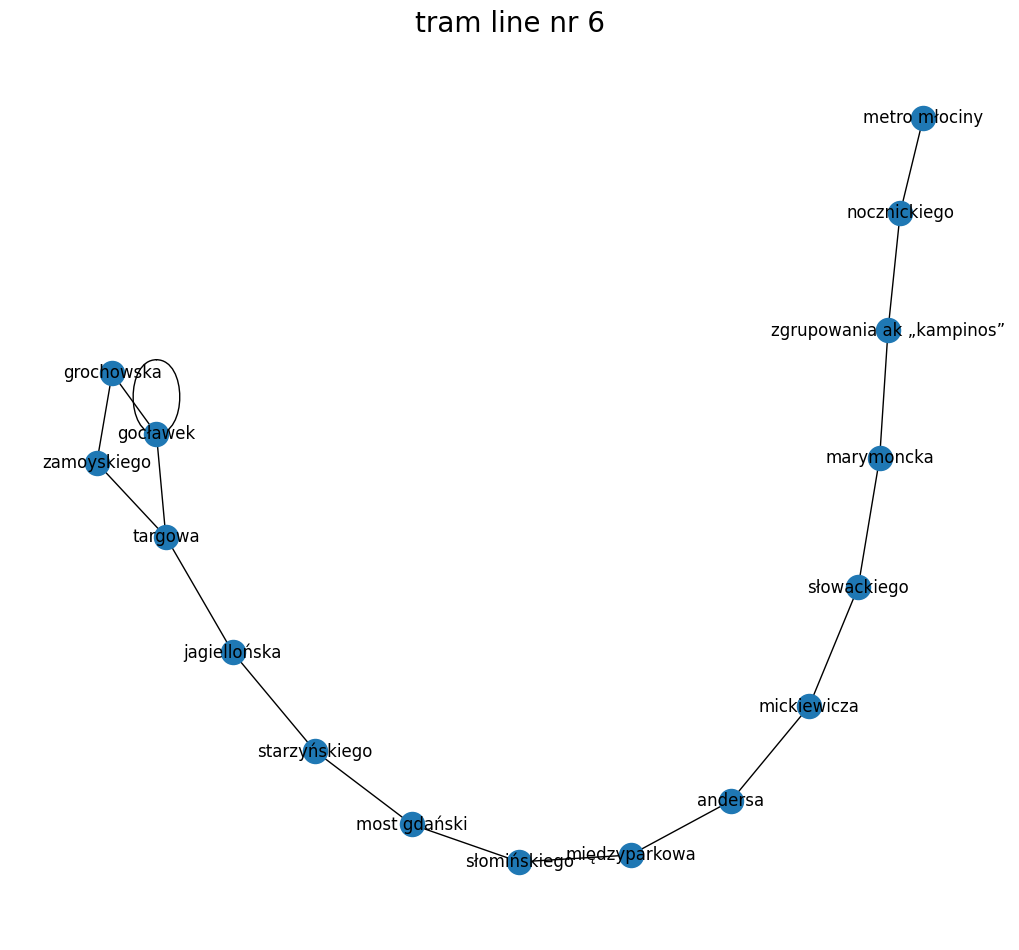

In [230]:

fig = plt.figure(figsize=(10,9))


pos = nx.spring_layout(G, seed=42)


nx.draw(G,pos,  with_labels= True)
plt.title('tram line nr 6', size = 20)
plt.show()

In [207]:
trams6

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type
121,0_6,2,6,NaN,"[METRO MŁOCINY, Nocznickiego, Zgrupowania AK „Kampinos”, Marymoncka, Słowackiego, Mickiewicza, Andersa, Międzyparkowa, Słomińskiego, most Gdański, Starzyńskiego, Jagiellońska, Targowa, Zamoyskiego, Grochowska, GOCŁAWEK, GOCŁAWEK, Targowa, Jagiellońska, Starzyńskiego, most Gdański, Słomińskiego, Międzyparkowa, Andersa, Mickiewicza, Słowackiego, Marymoncka, Zgrupowania AK „Kampinos”, Nocznickiego, METRO MŁOCINY]",0
461,1_6,2,6,NaN,"[METRO MŁOCINY, Nocznickiego, Zgrupowania AK „Kampinos”, Marymoncka, Słowackiego, Mickiewicza, Andersa, Międzyparkowa, Słomińskiego, most Gdański, Starzyńskiego, Jagiellońska, Targowa, Zamoyskiego, Grochowska, GOCŁAWEK, GOCŁAWEK, Targowa, Jagiellońska, Starzyńskiego, most Gdański, Słomińskiego, Międzyparkowa, Andersa, Mickiewicza, Słowackiego, Marymoncka, Zgrupowania AK „Kampinos”, Nocznickiego, METRO MŁOCINY]",0
802,2_6,2,6,NaN,"[METRO MŁOCINY, Nocznickiego, Zgrupowania AK „Kampinos”, Marymoncka, Słowackiego, Mickiewicza, Andersa, Międzyparkowa, Słomińskiego, most Gdański, Starzyńskiego, Jagiellońska, Targowa, Zamoyskiego, Grochowska, GOCŁAWEK, GOCŁAWEK, Targowa, Jagiellońska, Starzyńskiego, most Gdański, Słomińskiego, Międzyparkowa, Andersa, Mickiewicza, Słowackiego, Marymoncka, Zgrupowania AK „Kampinos”, Nocznickiego, METRO MŁOCINY]",0
1135,3_6,2,6,NaN,"[METRO MŁOCINY, Nocznickiego, Zgrupowania AK „Kampinos”, Marymoncka, Słowackiego, Mickiewicza, Andersa, Międzyparkowa, Słomińskiego, most Gdański, Starzyńskiego, Jagiellońska, Targowa, Zamoyskiego, Grochowska, GOCŁAWEK, GOCŁAWEK, Targowa, Jagiellońska, Starzyńskiego, most Gdański, Słomińskiego, Międzyparkowa, Andersa, Mickiewicza, Słowackiego, Marymoncka, Zgrupowania AK „Kampinos”, Nocznickiego, METRO MŁOCINY]",0
1442,4_6,2,6,NaN,"[METRO MŁOCINY, Nocznickiego, Zgrupowania AK „Kampinos”, Marymoncka, Słowackiego, Mickiewicza, Andersa, Międzyparkowa, Słomińskiego, most Gdański, Starzyńskiego, Jagiellońska, Targowa, Zamoyskiego, Grochowska, GOCŁAWEK, GOCŁAWEK, Targowa, Jagiellońska, Starzyńskiego, most Gdański, Słomińskiego, Międzyparkowa, Andersa, Mickiewicza, Słowackiego, Marymoncka, Zgrupowania AK „Kampinos”, Nocznickiego, METRO MŁOCINY]",0
1758,5_6,2,6,NaN,"[METRO MŁOCINY, Nocznickiego, Zgrupowania AK „Kampinos”, Marymoncka, Słowackiego, Mickiewicza, Andersa, Międzyparkowa, Słomińskiego, most Gdański, Starzyńskiego, Jagiellońska, Targowa, Zamoyskiego, Grochowska, GOCŁAWEK, GOCŁAWEK, Targowa, Jagiellońska, Starzyńskiego, most Gdański, Słomińskiego, Międzyparkowa, Andersa, Mickiewicza, Słowackiego, Marymoncka, Zgrupowania AK „Kampinos”, Nocznickiego, METRO MŁOCINY]",0
2102,6_6,2,6,NaN,"[METRO MŁOCINY, Nocznickiego, Zgrupowania AK „Kampinos”, Marymoncka, Słowackiego, Mickiewicza, Andersa, Międzyparkowa, Słomińskiego, most Gdański, Starzyńskiego, Jagiellońska, Targowa, Zamoyskiego, Grochowska, GOCŁAWEK, GOCŁAWEK, Targowa, Jagiellońska, Starzyńskiego, most Gdański, Słomińskiego, Międzyparkowa, Andersa, Mickiewicza, Słowackiego, Marymoncka, Zgrupowania AK „Kampinos”, Nocznickiego, METRO MŁOCINY]",0


In [ ]:
stops.loc['stop_name'] = stops['stop_name'].str.casefold()


In [235]:
stops

,stop_id,stop_code,stop_name,stop_lat,stop_lon
0,2,02,włochy-ratusz,52.192628,20.960045
1,15,01,krakowiaków,52.184943,20.953668
2,24,01,orzechowa,52.191881,20.949257
3,26,01,przedpole,52.192768,20.944688
4,30,01,pkp wkd al. jerozolimskie,52.205760,20.943216
...,...,...,...,...,...
6816,9783,51n,bitwy warszawskiej 1920 r.,52.211971,20.977594
6817,3591,04,pl. teatralny,52.244659,21.011132
6818,3592,01,pl. piłsudskiego,52.241898,21.012651
6819,9434,80,warszawa ursus północny,52.205754,20.889612


In [ ]:
s = stop_times[stop_times['trip_id'].str[:3] == '6_2']# .loc['stop_id']
s['stop_id']

5004863    2228
5004864    3552
5004865    2226
5004866    2239
5004867    2223
           ... 
5941745    7287
5941746    6785
5941747    6175
5941748    6426
5941749    4843
Name: stop_id, Length: 936887, dtype: int64

In [ ]:
pd.merge(left = s, right= stops[['stop_id','stop_name']])

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,stop_name
0,6_2_4745094,06:04:00,06:04:00,2228,0,NaN,0,1,0.000,1,gocław
1,6_2_4745094,06:05:00,06:05:00,3552,1,NaN,0,0,0.317,1,gocław
2,6_2_4745094,06:06:00,06:06:00,2226,2,NaN,0,0,0.576,1,horbaczewskiego
3,6_2_4745094,06:07:00,06:07:00,2239,3,NaN,0,0,0.936,1,bora-komorowskiego
4,6_2_4745094,06:09:00,06:09:00,2223,4,NaN,0,0,1.566,1,abrahama
...,...,...,...,...,...,...,...,...,...,...,...
936882,6_2_4480201,21:21:00,21:21:00,7287,5,NaN,0,0,2.745,1,winnica
936883,6_2_4480202,21:24:00,21:24:00,6785,1,NaN,0,0,0.313,1,winnica
936884,6_2_4480202,21:25:00,21:25:00,6175,2,NaN,0,0,0.860,1,poetów
936885,6_2_4480202,21:26:00,21:26:00,6426,3,NaN,3,3,1.335,1,przylesie


In [265]:
times_trips = pd.merge(left = stop_times, right = trips[['route_id','trip_id'	]] )
times_trips6 = times_trips[times_trips['route_id']== '0_6']


In [267]:
fin = pd.merge(left = times_trips6, right = stops[['stop_id','stop_name',	'stop_lat',	'stop_lon'	]] )

In [ ]:
graph6 = fin.loc[fin['trip_id']=='0_2_4129112']
fin.loc[fin['trip_id']=='0_2_4129112']

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,route_id,stop_name,stop_lat,stop_lon
18,0_2_4129112,06:52:00,06:52:00,7986,0,NaN,0,1,0.000,1,0_6,gocławek,52.238169,21.118884
19,0_2_4129112,06:52:00,06:52:00,7812,1,NaN,0,0,0.064,1,0_6,gocławek,52.238441,21.117996
20,0_2_4129112,06:53:00,06:53:00,7792,2,NaN,0,0,0.458,1,0_6,kwatery głównej,52.240200,21.113066
21,0_2_4129112,06:54:00,06:54:00,7791,3,NaN,0,0,0.840,1,0_6,żółkiewskiego,52.241313,21.107802
22,0_2_4129112,06:55:00,06:55:00,7789,4,NaN,0,0,1.211,1,0_6,pl. szembeka,52.242414,21.102623
23,0_2_4129112,06:57:00,06:57:00,7787,5,NaN,0,0,1.713,1,0_6,wspólna droga,52.243887,21.095697
24,0_2_4129112,06:58:00,06:58:00,7785,6,NaN,0,0,2.036,1,0_6,czapelska,52.244831,21.091233
25,0_2_4129112,07:01:00,07:01:00,7784,7,NaN,0,0,2.623,1,0_6,wiatraczna,52.245420,21.082547
26,0_2_4129112,07:02:00,07:02:00,7769,8,NaN,0,0,2.852,1,0_6,kickiego,52.245621,21.079289
27,0_2_4129112,07:03:00,07:03:00,7781,9,NaN,0,0,3.127,1,0_6,międzyborska,52.245864,21.075239


In [ ]:
stopLabels = graph6['stop_name']
stopNames = graph6['stop_id']
edges = []
for i in range(len(graph6['stop_id'])-1):
    edges.append((int(graph6['stop_id'].iloc[i]),int(graph6['stop_id'].iloc[i+1])))

    
G = nx.Graph()
G.add_nodes_from(stopNames)
G.add_edges_from(edges)

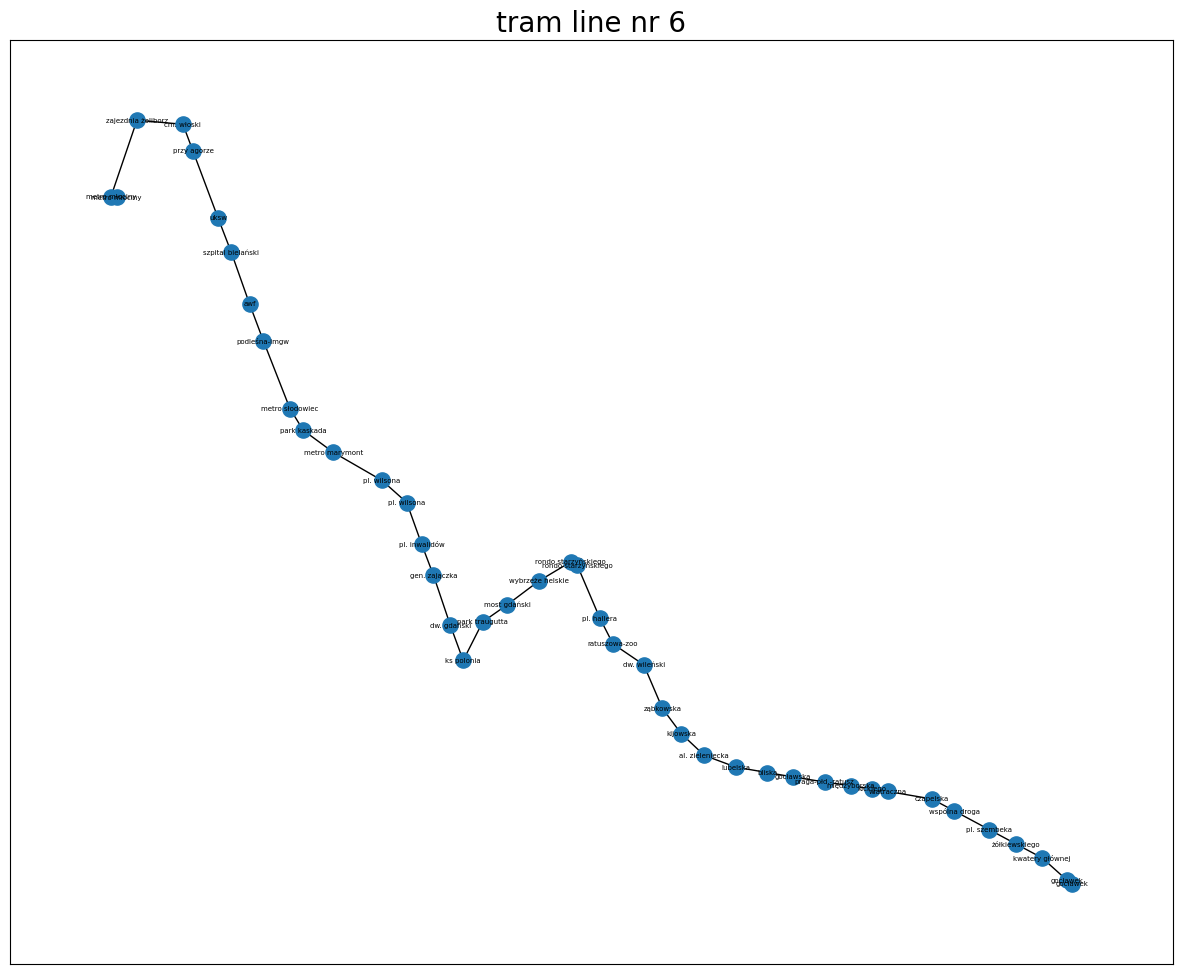

In [320]:
stopLabels_dict = dict(zip(graph6['stop_id'], graph6['stop_name']))
fig = plt.figure(figsize=(15,12))


pos = {row['stop_id']: (row['stop_lon'], row['stop_lat']) 
       for _, row in graph6.iterrows()}

nx.draw_networkx_nodes(G, pos, node_size  = 120)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels=stopLabels_dict, font_size  =5)

plt.title('tram line nr 6', size = 20)
plt.show()

In [321]:
tramRoutes

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type
117,0_1,2,1,NaN,"[ANNOPOL, Annopol, Rembielińska, Matki Teresy z Kalkuty, Odrowąża, Starzyńskiego, most Gdański, Słomińskiego, Okopowa, Towarowa, Grójecka, al. Krakowska, P+R AL. KRAKOWSKA, P+R AL. KRAKOWSKA, Grójecka, Towarowa, Okopowa, Słomińskiego, most Gdański, Starzyńskiego, Odrowąża, Matki Teresy z Kalkuty, Rembielińska, Annopol, ANNOPOL]",0
118,0_2,2,2,NaN,"[METRO MŁOCINY, Kasprowicza, Nocznickiego, Zgrupowania AK „Kampinos”, al. płk. Kuklińskiego, Trakt Nadwiślański, Światowida, WINNICA, WINNICA, Trakt Nadwiślański, al. płk. Kuklińskiego, Zgrupowania AK „Kampinos”, Kasprowicza, METRO MŁOCINY]",0
119,0_3,2,3,NaN,"[ANNOPOL, Annopol, Rembielińska, Matki Teresy z Kalkuty, Odrowąża, 11 Listopada, Targowa, Zamoyskiego, Grochowska, GOCŁAWEK, GOCŁAWEK, Targowa, 11 Listopada, Odrowąża, Matki Teresy z Kalkuty, Rembielińska, Annopol, ANNOPOL]",0
120,0_4,2,4,NaN,"[ŻERAŃ WSCHODNI, Rembielińska, Matki Teresy z Kalkuty, Odrowąża, 11 Listopada, al. „Solidarności”, pl. Bankowy, Marszałkowska, Puławska, WYŚCIGI, WYŚCIGI, Marszałkowska, pl. Konstytucji, Marszałkowska, pl. Bankowy, al. „Solidarności”, Targowa, 11 Listopada, Odrowąża, Matki Teresy z Kalkuty, Rembielińska, Annopol, ŻERAŃ WSCHODNI]",0
121,0_6,2,6,NaN,"[METRO MŁOCINY, Nocznickiego, Zgrupowania AK „Kampinos”, Marymoncka, Słowackiego, Mickiewicza, Andersa, Międzyparkowa, Słomińskiego, most Gdański, Starzyńskiego, Jagiellońska, Targowa, Zamoyskiego, Grochowska, GOCŁAWEK, GOCŁAWEK, Targowa, Jagiellońska, Starzyńskiego, most Gdański, Słomińskiego, Międzyparkowa, Andersa, Mickiewicza, Słowackiego, Marymoncka, Zgrupowania AK „Kampinos”, Nocznickiego, METRO MŁOCINY]",0
...,...,...,...,...,...,...
2119,6_26,2,26,NaN,"[METRO MŁOCINY, Nocznickiego, Kasprowicza, Nocznickiego, Wólczyńska, Broniewskiego, al. Reymonta, Powstańców Śląskich, Połczyńska, Wolska, al. „Solidarności”, Targowa, Zamoyskiego, Grochowska, rondo Wiatraczna, WIATRACZNA, WIATRACZNA, Grochowska, Targowa, al. „Solidarności”, Wolska, Połczyńska, Powstańców Śląskich, al. Reymonta, Wólczyńska, Nocznickiego, METRO MŁOCINY]",0
2120,6_27,2,27,NaN,"[METRO MARYMONT, Słowackiego, ks. Popiełuszki, pl. Grunwaldzki, al. Jana Pawła II, Okopowa, al. „Solidarności”, Wolska, CM. WOLSKI, CM. WOLSKI, al. „Solidarności”, Okopowa, al. Jana Pawła II, pl. Grunwaldzki, ks. Popiełuszki, Słowackiego, METRO MARYMONT]",0
2121,6_28,2,28,NaN,"[DW. WSCHODNI (KIJOWSKA), Kijowska, Targowa, Jagiellońska, Starzyńskiego, most Gdański, Słomińskiego, al. Jana Pawła II, Broniewskiego, al. Reymonta, Powstańców Śląskich, Górczewska, OS. GÓRCZEWSKA, OS. GÓRCZEWSKA, Powstańców Śląskich, al. Reymonta, Broniewskiego, al. Jana Pawła II, Słomińskiego, most Gdański, Starzyńskiego, Jagiellońska, Targowa, Kijowska, DW. WSCHODNI (KIJOWSKA)]",0
2122,6_31,2,31,NaN,"[METRO WIERZBNO, Woronicza, Wołoska, Marynarska, PKP SŁUŻEWIEC, PKP SŁUŻEWIEC, Wołoska, Woronicza, METRO WIERZBNO]",0


In [322]:
times_trips = times_trips[times_trips['route_id'].isin(tramRoutes['route_id'])]
times_trips

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,route_id
78418,0_2_4774547,04:05:00,04:05:00,7874,0,NaN,1,1,0.000,1,0_1
78419,0_2_4774547,04:06:00,04:06:00,7656,1,NaN,0,0,0.182,1,0_1
78420,0_2_4774547,04:09:00,04:09:00,7655,2,NaN,0,0,0.702,1,0_1
78421,0_2_4774547,04:10:00,04:10:00,7670,3,NaN,0,0,1.009,1,0_1
78422,0_2_4774547,04:11:00,04:11:00,7885,4,NaN,0,0,1.342,1,0_1
...,...,...,...,...,...,...,...,...,...,...,...
5297789,6_2_4750449,21:18:00,21:18:00,7907,27,NaN,0,0,11.894,1,6_33
5297790,6_2_4750449,21:20:00,21:20:00,7740,28,NaN,0,0,12.675,1,6_33
5297791,6_2_4750449,21:21:00,21:21:00,8043,29,NaN,0,0,12.886,1,6_33
5297792,6_2_4750449,21:24:00,21:24:00,7922,30,NaN,0,0,13.725,1,6_33


In [323]:
fin = pd.merge(left = times_trips, right = stops[['stop_id','stop_name',	'stop_lat',	'stop_lon'	]] )

In [324]:
#graph = fin.loc[fin['trip_id']=='0_2_4129112']
#fin.loc[fin['trip_id']=='0_2_4129112']
fin

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,route_id,stop_name,stop_lat,stop_lon
0,0_2_4774547,04:05:00,04:05:00,7874,0,NaN,1,1,0.000,1,0_1,r1(w),52.234309,20.972930
1,0_2_4774547,04:06:00,04:06:00,7656,1,NaN,0,0,0.182,1,0_1,zajezdnia wola,52.235268,20.974324
2,0_2_4774547,04:09:00,04:09:00,7655,2,NaN,0,0,0.702,1,0_1,okopowa,52.236126,20.980451
3,0_2_4774547,04:10:00,04:10:00,7670,3,NaN,0,0,1.009,1,0_1,muzeum powstania warszawskiego,52.233533,20.981994
4,0_2_4774547,04:11:00,04:11:00,7885,4,NaN,0,0,1.342,1,0_1,rondo daszyńskiego,52.230822,20.983975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336233,6_2_4750449,21:18:00,21:18:00,7907,27,NaN,0,0,11.894,1,6_33,nocznickiego,52.284735,20.922889
1336234,6_2_4750449,21:20:00,21:20:00,7740,28,NaN,0,0,12.675,1,6_33,metro młociny,52.290292,20.929647
1336235,6_2_4750449,21:21:00,21:21:00,8043,29,NaN,0,0,12.886,1,6_33,metro młociny,52.291870,20.930181
1336236,6_2_4750449,21:24:00,21:24:00,7922,30,NaN,0,0,13.725,1,6_33,zajezdnia żoliborz,52.298461,20.934239


In [348]:
stopLabels = fin['stop_name']
stopNames = fin['stop_id']
edges = []
for i in range(len(fin['stop_id'])-1):
    if (fin['trip_id'].iloc[i]==fin['trip_id'].iloc[i+1]):
        edges.append((int(fin['stop_id'].iloc[i]),int(fin['stop_id'].iloc[i+1])))

    
G = nx.Graph()
G.add_nodes_from(stopNames)
G.add_edges_from(edges)

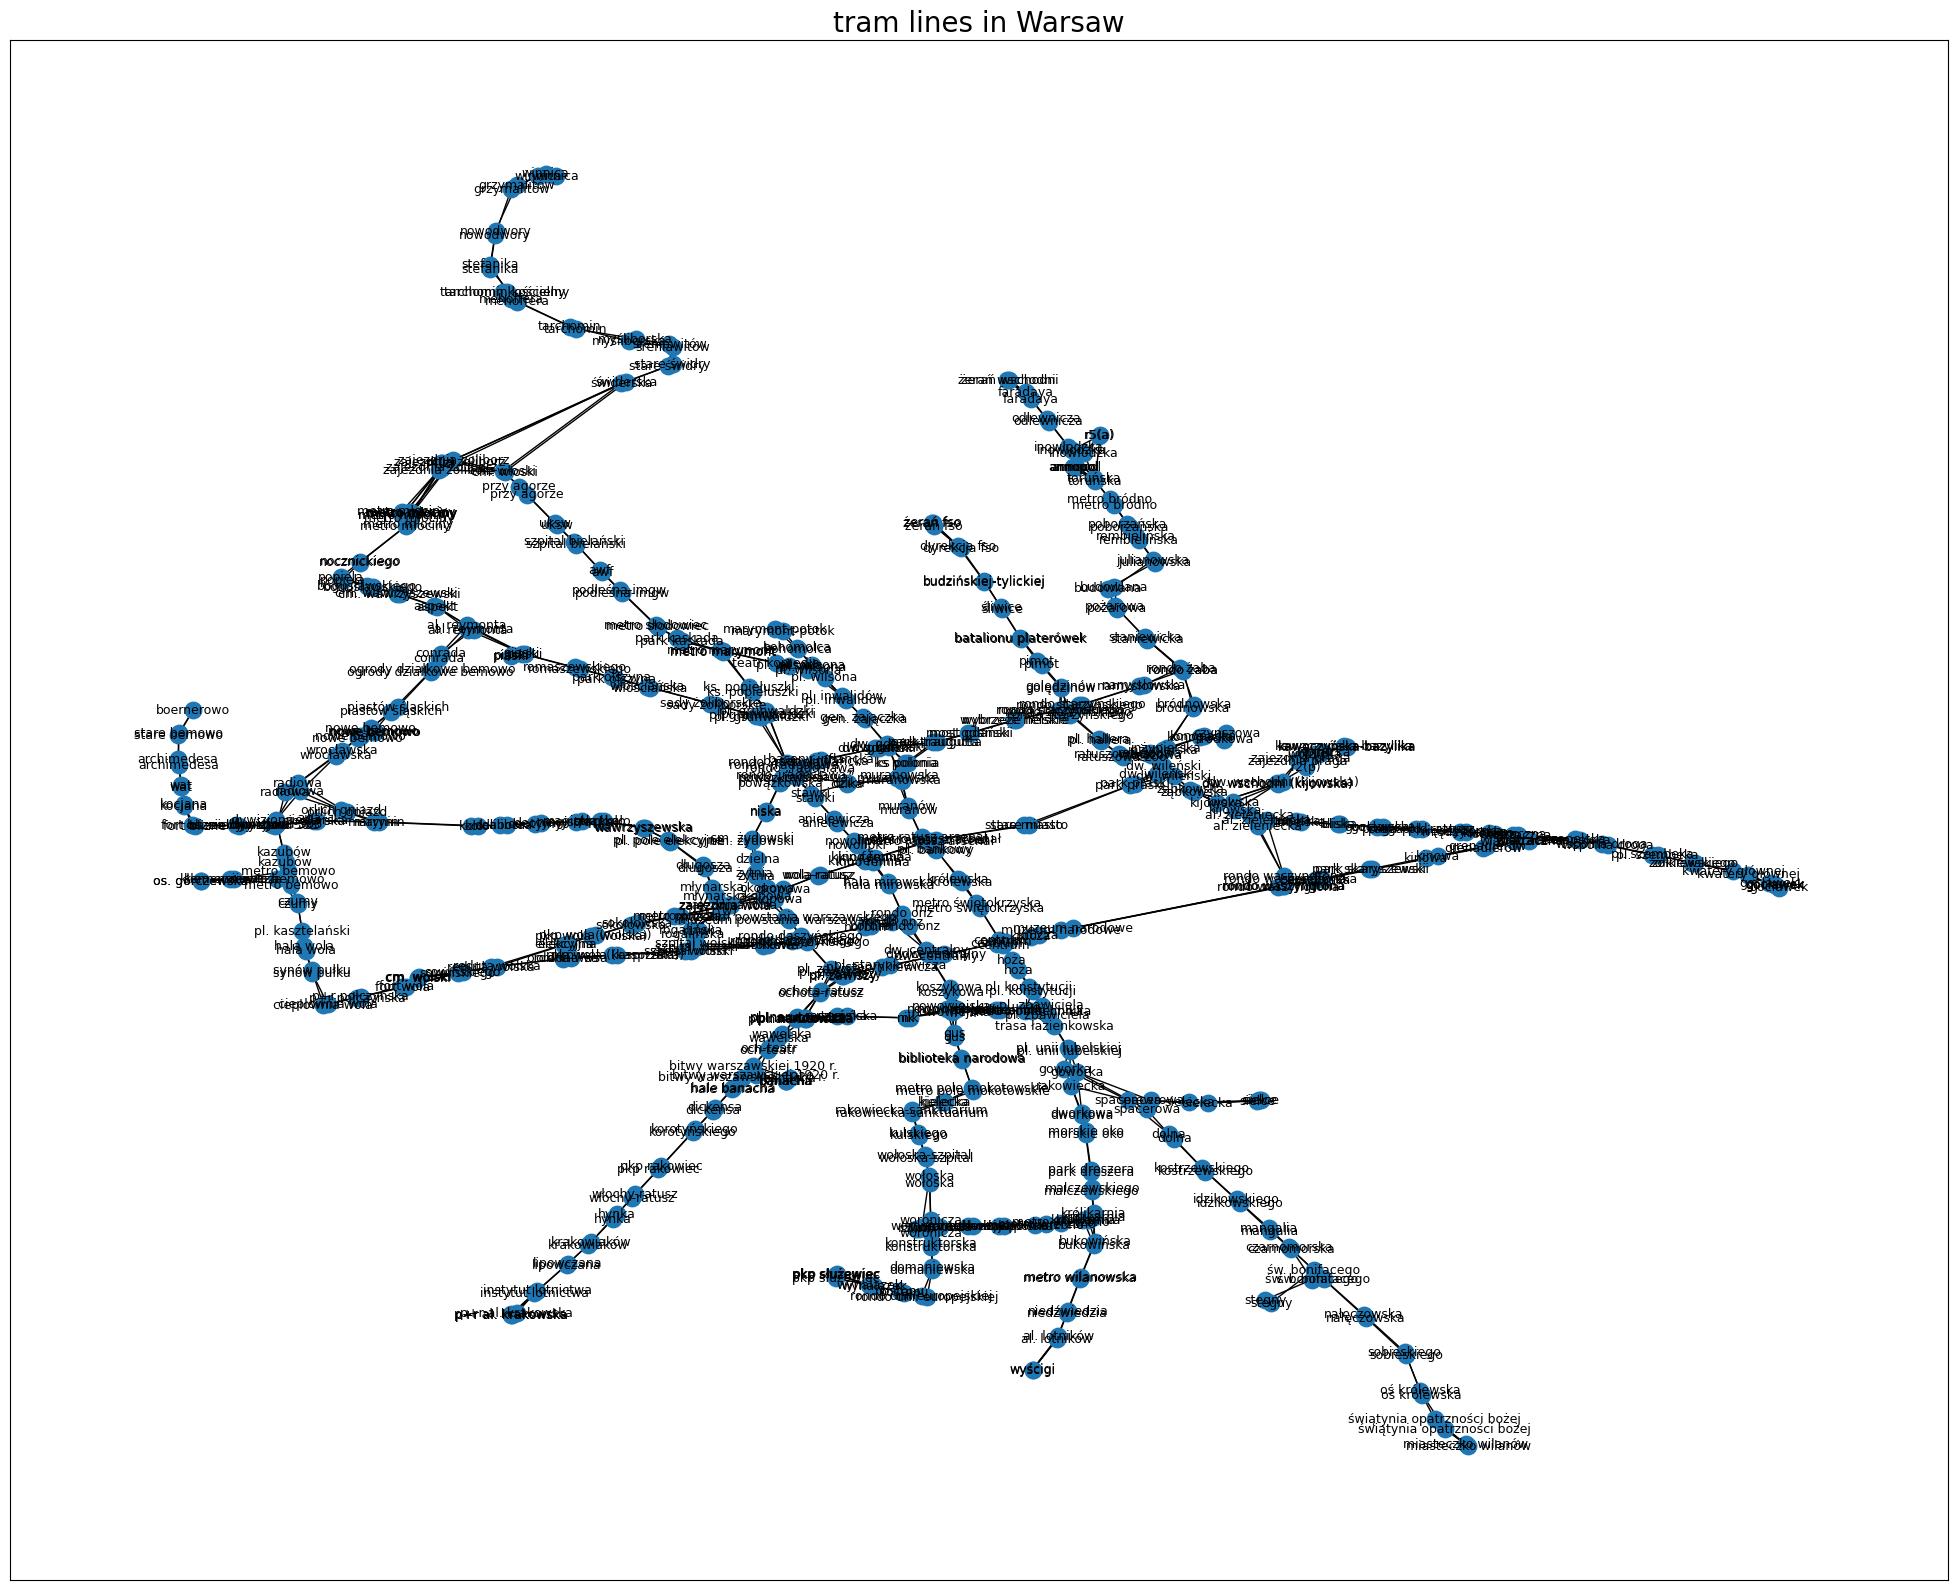

In [349]:
stopLabels_dict = dict(zip(fin['stop_id'], fin['stop_name']))
fig = plt.figure(figsize=(25,20))


pos = {row['stop_id']: (row['stop_lon'], row['stop_lat']) 
       for _, row in fin.iterrows()}

nx.draw_networkx_nodes(G, pos, node_size  = 140)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels=stopLabels_dict, font_size  =9)

plt.title('tram lines in Warsaw', size = 20)
plt.show()

In [351]:
trainRoutes = routes.loc[routes['route_type']==2]
trainRoutes.head(2)

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type
0,0_A1,5,A1,NaN,WARSZAWA ŚRÓDMIEŚCIE WKD - Opacz-Kolonia/ - WKD/ - WKD GRODZISK MAZOWIECKI RADOŃSKA|WKD MILANÓWEK GRUDÓW - Opacz-Kolonia/ - WARSZAWA ŚRÓDMIEŚCIE WKD|WKD GRODZISK MAZOWIECKI RADOŃSKA - WKD/ - Opacz-Kolonia/ - WARSZAWA ŚRÓDMIEŚCIE WKD,2
1,0_A12,5,A12,NaN,WARSZAWA ŚRÓDMIEŚCIE WKD - WKD/ - WKD MILANÓWEK GRUDÓW,2


In [ ]:
trainRoutes.loc[:, 'route_desc'] = trainRoutes['route_desc'].str.replace('|', ' - ').str.split(' - ')
trainRoutes.head(2)

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type
0,0_A1,5,A1,NaN,"[WARSZAWA ŚRÓDMIEŚCIE WKD, Opacz-Kolonia/, WKD/, WKD GRODZISK MAZOWIECKI RADOŃSKA, WKD MILANÓWEK GRUDÓW, Opacz-Kolonia/, WARSZAWA ŚRÓDMIEŚCIE WKD, WKD GRODZISK MAZOWIECKI RADOŃSKA, WKD/, Opacz-Kolonia/, WARSZAWA ŚRÓDMIEŚCIE WKD]",2
1,0_A12,5,A12,NaN,"[WARSZAWA ŚRÓDMIEŚCIE WKD, WKD/, WKD MILANÓWEK GRUDÓW]",2


In [364]:
times_trips = pd.merge(left = stop_times, right = trips[['route_id','trip_id'	]] )

times_trips = times_trips[times_trips['route_id'].isin(trainRoutes['route_id'])]
fin = pd.merge(left = times_trips, right = stops[['stop_id','stop_name',	'stop_lat',	'stop_lon'	]] )

In [365]:
stopLabels = fin['stop_name']
stopNames = fin['stop_id']
edges = []
for i in range(len(fin['stop_id'])-1):
    if (fin['trip_id'].iloc[i]==fin['trip_id'].iloc[i+1]):
        edges.append((int(fin['stop_id'].iloc[i]),int(fin['stop_id'].iloc[i+1])))

    
G = nx.Graph()
G.add_nodes_from(stopNames)
G.add_edges_from(edges)

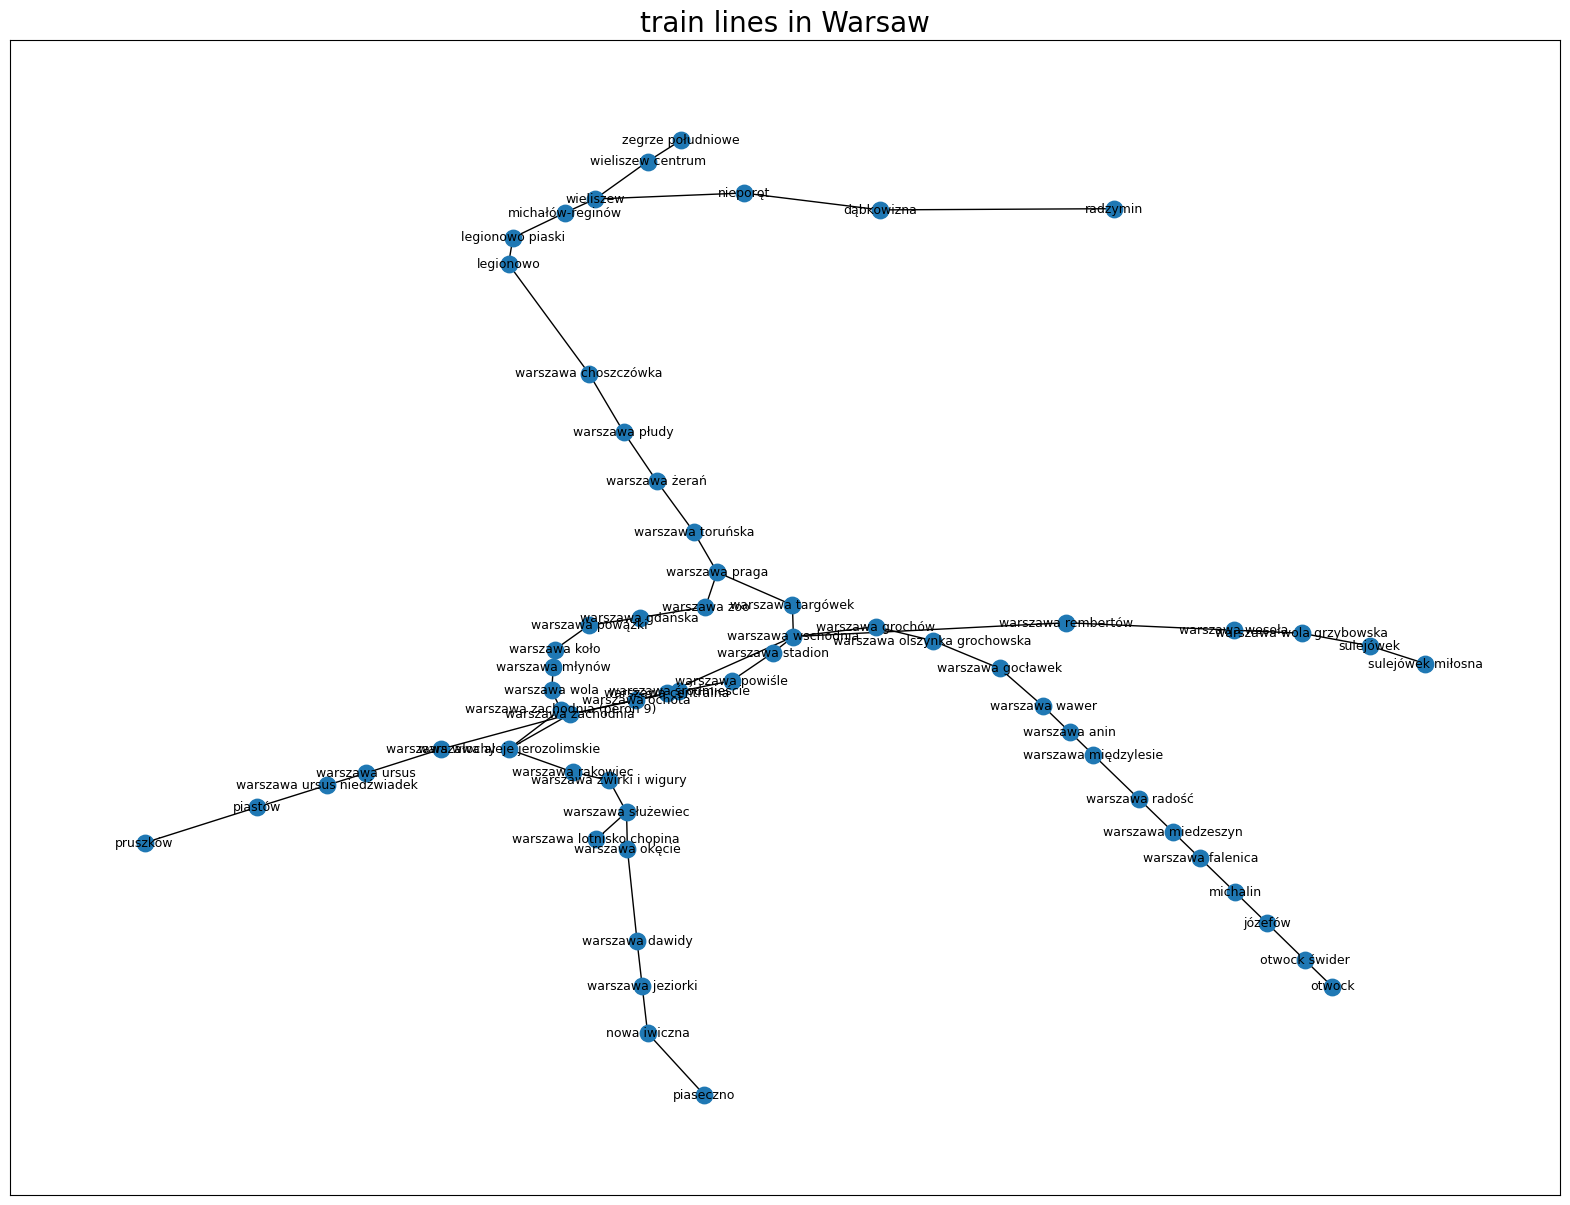

In [368]:
stopLabels_dict = dict(zip(fin['stop_id'], fin['stop_name']))
fig = plt.figure(figsize=(20,15))


pos = {row['stop_id']: (row['stop_lon'], row['stop_lat']) 
       for _, row in fin.iterrows()}

nx.draw_networkx_nodes(G, pos, node_size  = 140)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels=stopLabels_dict, font_size  =9)

plt.title('train lines in Warsaw', size = 20)
plt.show()

In [373]:
busRoutes = routes.loc[routes['route_type']==3]
busRoutes.head(2)

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type
2,0_E-1,2,E-1,NaN,METRO STADION NARODOWY - Sokola - Zwycięzców - Saska - Bora-Komorowskiego - GOCŁAW|GOCŁAW - Egipska - Saska - Zwycięzców - Sokola - METRO STADION NARODOWY,3
3,0_E-2,2,E-2,NaN,METRO RATUSZ ARSENAŁ - al. „Solidarności” - pl. Bankowy - Krakowskie Przedmieście - Nowy Świat - Al. Ujazdowskie - Sobieskiego - al. Wilanowska - Przyczółkowa - WILANÓW|WILANÓW - al. Wilanowska - Sobieskiego - Belwederska - Al. Ujazdowskie - pl. Trzech Krzyży - Nowy Świat - Krakowskie Przedmieście - al. „Solidarności” - METRO RATUSZ ARSENAŁ,3


In [ ]:
busRoutes.loc[:, 'route_desc'] = busRoutes['route_desc'].str.replace('|', ' - ').str.split(' - ')
busRoutes.head(2)

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type
2,0_E-1,2,E-1,NaN,"[METRO STADION NARODOWY, Sokola, Zwycięzców, Saska, Bora-Komorowskiego, GOCŁAW, GOCŁAW, Egipska, Saska, Zwycięzców, Sokola, METRO STADION NARODOWY]",3
3,0_E-2,2,E-2,NaN,"[METRO RATUSZ ARSENAŁ, al. „Solidarności”, pl. Bankowy, Krakowskie Przedmieście, Nowy Świat, Al. Ujazdowskie, Sobieskiego, al. Wilanowska, Przyczółkowa, WILANÓW, WILANÓW, al. Wilanowska, Sobieskiego, Belwederska, Al. Ujazdowskie, pl. Trzech Krzyży, Nowy Świat, Krakowskie Przedmieście, al. „Solidarności”, METRO RATUSZ ARSENAŁ]",3


In [375]:
times_trips = pd.merge(left = stop_times, right = trips[['route_id','trip_id'	]] )

times_trips = times_trips[times_trips['route_id'].isin(busRoutes['route_id'])]
fin = pd.merge(left = times_trips, right = stops[['stop_id','stop_name',	'stop_lat',	'stop_lon'	]] )

In [376]:
stopLabels = fin['stop_name']
stopNames = fin['stop_id']
edges = []
for i in range(len(fin['stop_id'])-1):
    if (fin['trip_id'].iloc[i]==fin['trip_id'].iloc[i+1]):
        edges.append((int(fin['stop_id'].iloc[i]),int(fin['stop_id'].iloc[i+1])))

    
G = nx.Graph()
G.add_nodes_from(stopNames)
G.add_edges_from(edges)

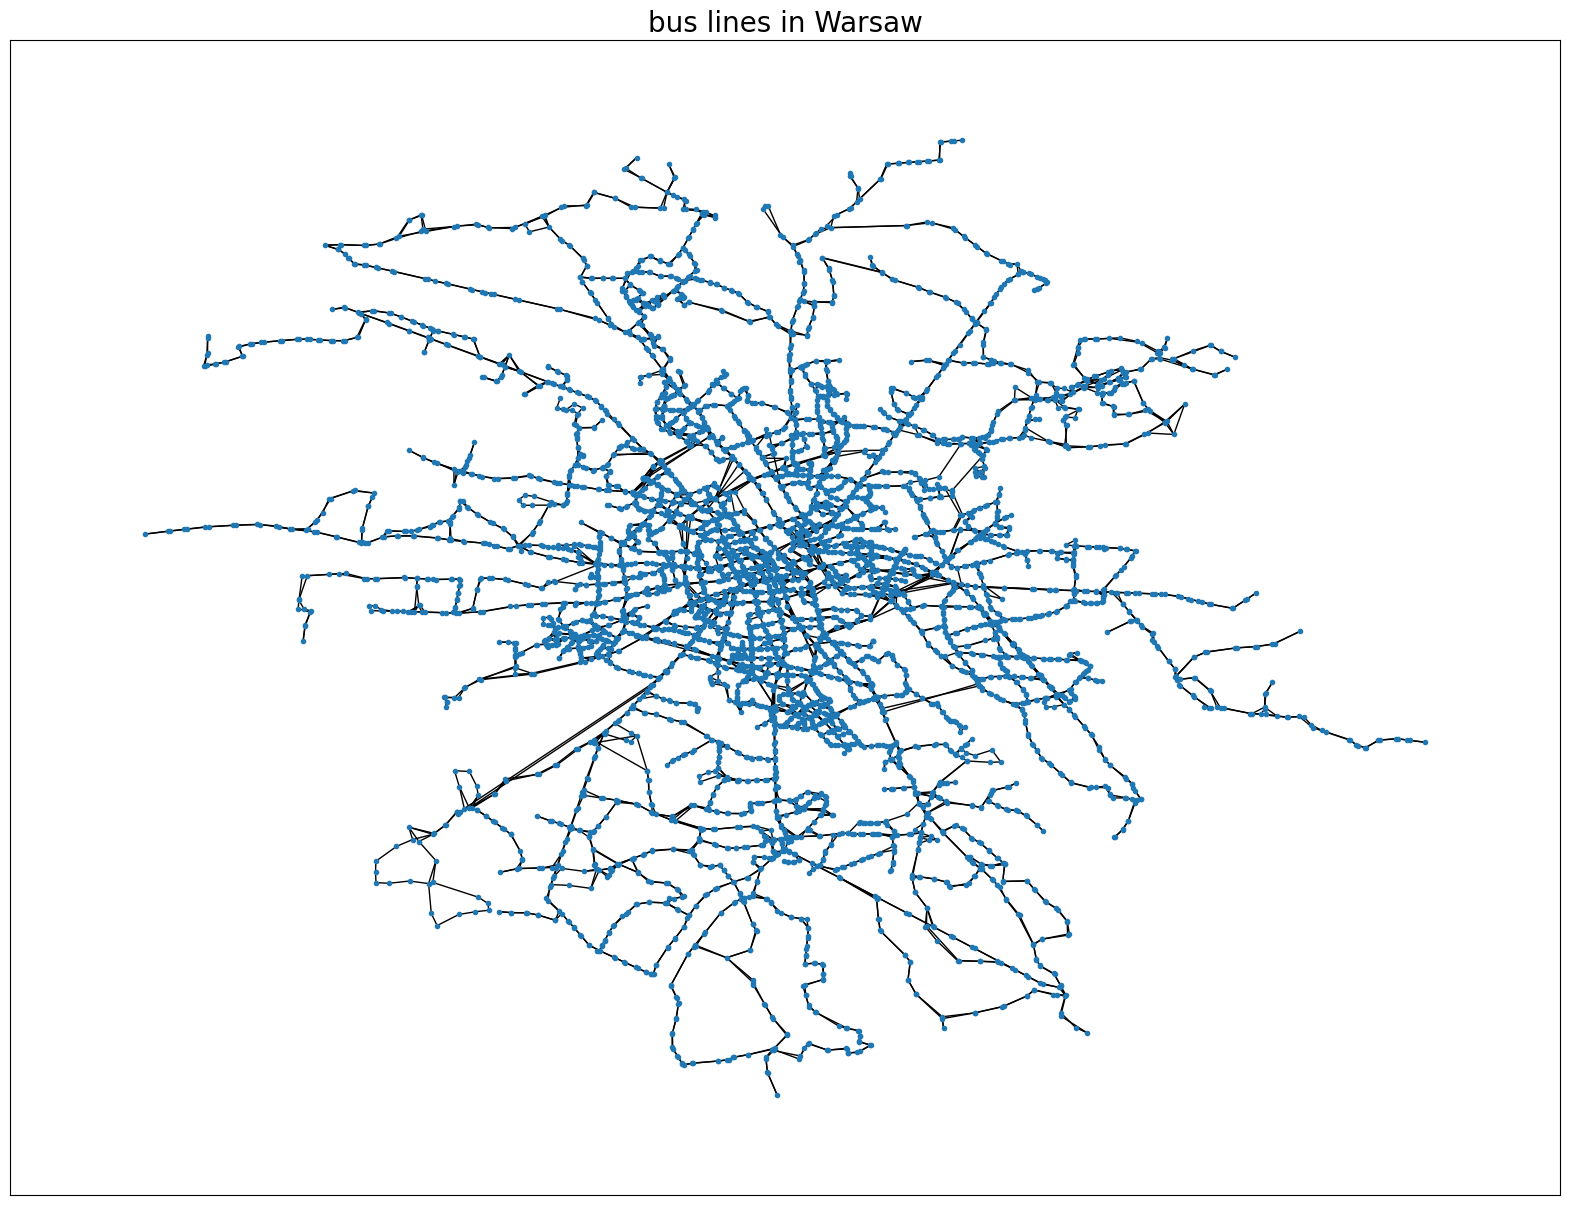

In [ ]:
stopLabels_dict = dict(zip(fin['stop_id'], fin['stop_name']))
fig = plt.figure(figsize=(20,15))


pos = {row['stop_id']: (row['stop_lon'], row['stop_lat']) 
       for _, row in fin.iterrows()}

nx.draw_networkx_nodes(G, pos, node_size  = 9)
nx.draw_networkx_edges(G, pos)

plt.title('bus lines in Warsaw', size = 20)
plt.show()

In [517]:
times_trips

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,route_id,hours,minutes,timestamp
0,0_2_4745094,06:04:00,06:04:00,2228,0,NaN,0,1,0.000,1,0_E-1,6,4,364
1,0_2_4745094,06:05:00,06:05:00,3552,1,NaN,0,0,0.317,1,0_E-1,6,5,365
2,0_2_4745094,06:06:00,06:06:00,2226,2,NaN,0,0,0.576,1,0_E-1,6,6,366
3,0_2_4745094,06:07:00,06:07:00,2239,3,NaN,0,0,0.936,1,0_E-1,6,7,367
4,0_2_4745094,06:09:00,06:09:00,2223,4,NaN,0,0,1.566,1,0_E-1,6,9,369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5941745,6_2_4480201,21:21:00,21:21:00,7287,5,NaN,0,0,2.745,1,6_900,21,21,1281
5941746,6_2_4480202,21:24:00,21:24:00,6785,1,NaN,0,0,0.313,1,6_900,21,24,1284
5941747,6_2_4480202,21:25:00,21:25:00,6175,2,NaN,0,0,0.860,1,6_900,21,25,1285
5941748,6_2_4480202,21:26:00,21:26:00,6426,3,NaN,3,3,1.335,1,6_900,21,26,1286


In [518]:
#DO ANIMACJI
times_trips = pd.merge(left = stop_times, right = trips[['route_id','trip_id'	]] )


times_trips

stopLabels = stops['stop_name']
stopNames = stops['stop_id']
edges = []
for i in range(times_trips.shape[0]-1):
    if (times_trips['trip_id'].iloc[i]==times_trips['trip_id'].iloc[i+1]):
        edges.append((int(times_trips['stop_id'].iloc[i]),int(times_trips['stop_id'].iloc[i+1])))

    
G = nx.Graph()
G.add_nodes_from(stopNames)
G.add_edges_from(edges)

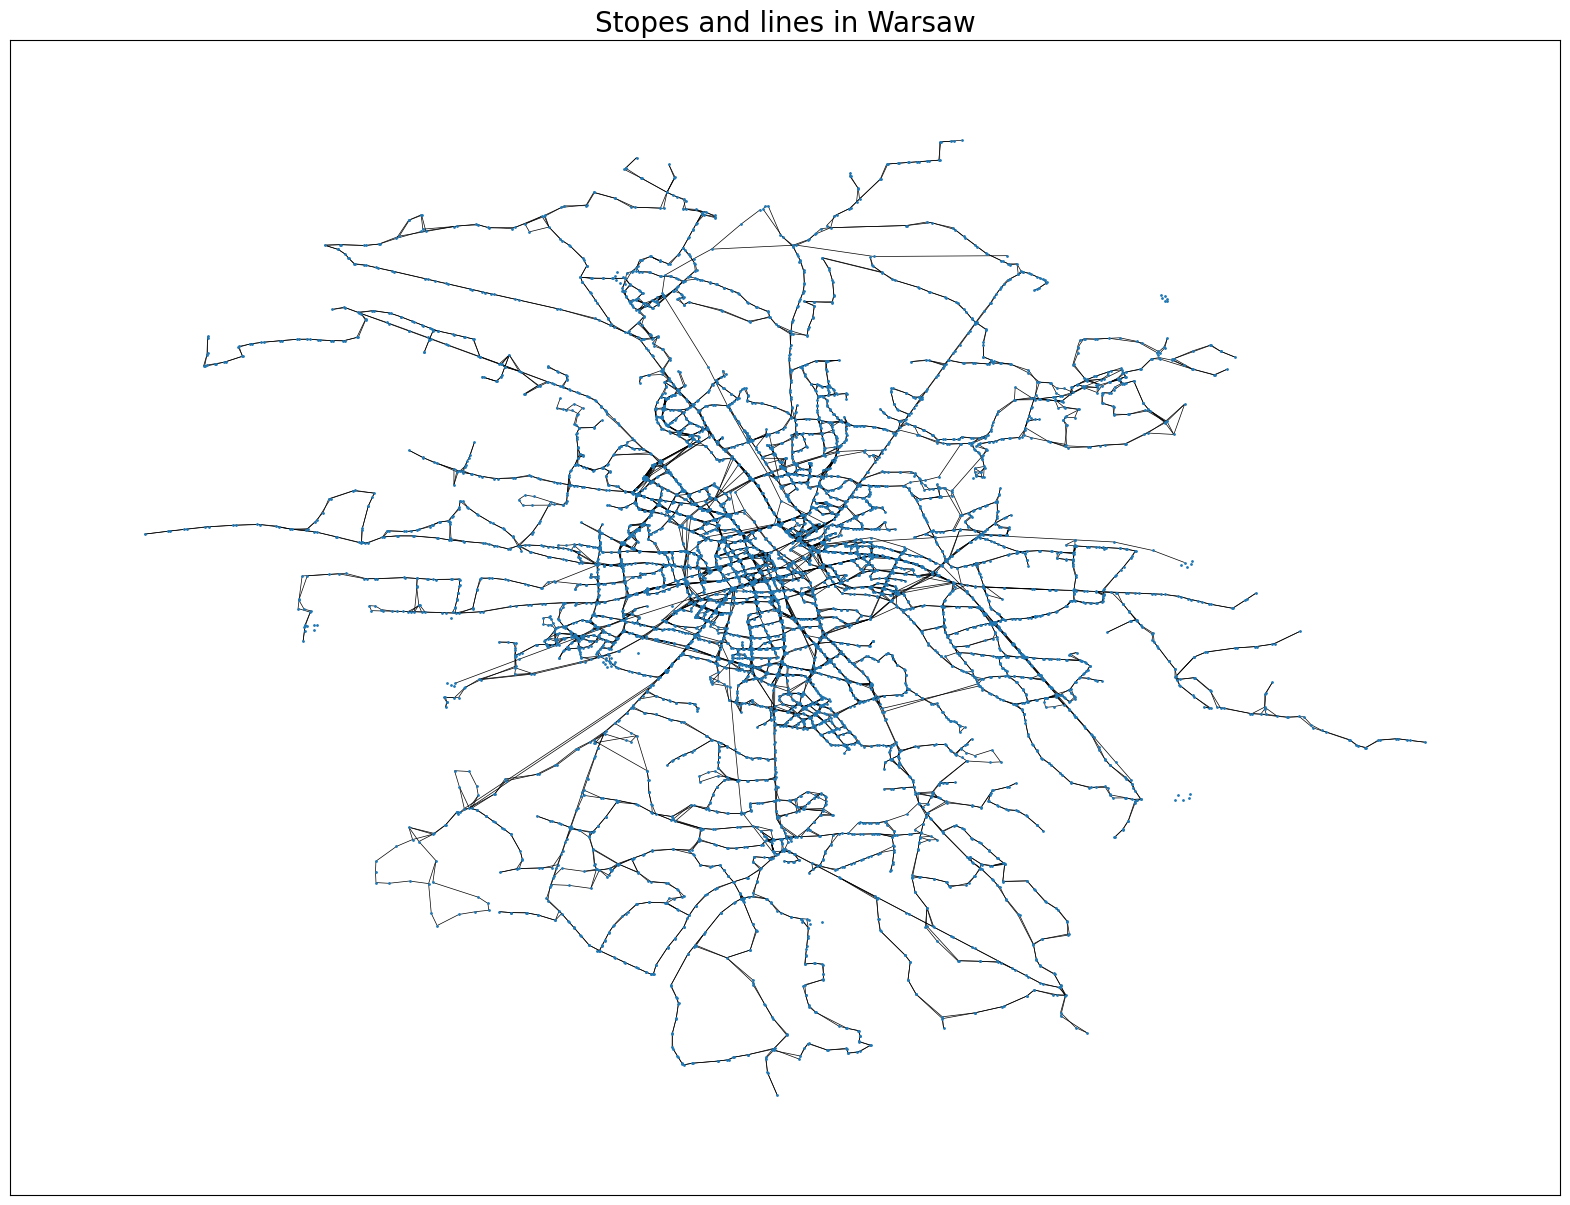

In [519]:
stopLabels_dict = dict(zip(stopLabels, stopNames))
fig = plt.figure(figsize=(20,15))


pos = {row['stop_id']: (row['stop_lon'], row['stop_lat']) for _, row in stops.iterrows()}

nx.draw_networkx_nodes(G, pos, node_size  = 1)
nx.draw_networkx_edges(G, pos, width = 0.5)

plt.title('Stopes and lines in Warsaw', size = 20)
plt.show()

In [520]:
times_trips[times_trips['arrival_time']=='06:04:00']

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,route_id
0,0_2_4745094,06:04:00,06:04:00,2228,0,NaN,0,1,0.000,1,0_E-1
1243,0_2_4292112,06:04:00,06:04:00,501,2,NaN,0,0,1.069,1,0_E-2
3859,0_2_4744951,06:04:00,06:04:00,4095,33,NaN,3,3,30.057,1,0_L11
4563,0_2_4744967,06:04:00,06:04:00,4156,13,NaN,3,3,13.652,1,0_L11
4816,0_2_4744972,06:04:00,06:04:00,4498,42,NaN,3,3,34.478,1,0_L11
...,...,...,...,...,...,...,...,...,...,...,...
5939140,6_2_4352495,06:04:00,06:04:00,4566,32,NaN,0,0,26.985,1,6_755
5940158,6_2_4522255,06:04:00,06:04:00,6899,1,NaN,3,3,0.709,1,6_809
5940306,6_2_4522154,06:04:00,06:04:00,2436,19,NaN,3,3,9.112,1,6_815
5940630,6_2_4522214,06:04:00,06:04:00,770,19,NaN,0,0,9.610,1,6_815


In [ ]:
times_trips['hours'] = times_trips['arrival_time'].str[:2].astype('int32')
times_trips['minutes'] = times_trips['arrival_time'].str[3:5].astype('int32')
times_trips['timestamp'] = (times_trips['hours']*60+times_trips['minutes']).astype(int)


In [524]:
grouped = times_trips.groupby(['timestamp','stop_id']).count()

In [525]:
grouped = grouped.iloc[:,0]

In [526]:
grouped

timestamp  stop_id
198        1536       7
           1961       5
199        1537       7
           1962       5
200        1874       7
                     ..
1773       1836       7
1774       1834       7
           1835       7
1777       4042       7
1778       4043       7
Name: trip_id, Length: 1243553, dtype: int64

In [527]:
times_trips = times_trips[times_trips['route_id'].isin(tramRoutes['route_id'])]
times_trips

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,route_id,hours,minutes,timestamp
78418,0_2_4774547,04:05:00,04:05:00,7874,0,NaN,1,1,0.000,1,0_1,4,5,245
78419,0_2_4774547,04:06:00,04:06:00,7656,1,NaN,0,0,0.182,1,0_1,4,6,246
78420,0_2_4774547,04:09:00,04:09:00,7655,2,NaN,0,0,0.702,1,0_1,4,9,249
78421,0_2_4774547,04:10:00,04:10:00,7670,3,NaN,0,0,1.009,1,0_1,4,10,250
78422,0_2_4774547,04:11:00,04:11:00,7885,4,NaN,0,0,1.342,1,0_1,4,11,251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5297789,6_2_4750449,21:18:00,21:18:00,7907,27,NaN,0,0,11.894,1,6_33,21,18,1278
5297790,6_2_4750449,21:20:00,21:20:00,7740,28,NaN,0,0,12.675,1,6_33,21,20,1280
5297791,6_2_4750449,21:21:00,21:21:00,8043,29,NaN,0,0,12.886,1,6_33,21,21,1281
5297792,6_2_4750449,21:24:00,21:24:00,7922,30,NaN,0,0,13.725,1,6_33,21,24,1284


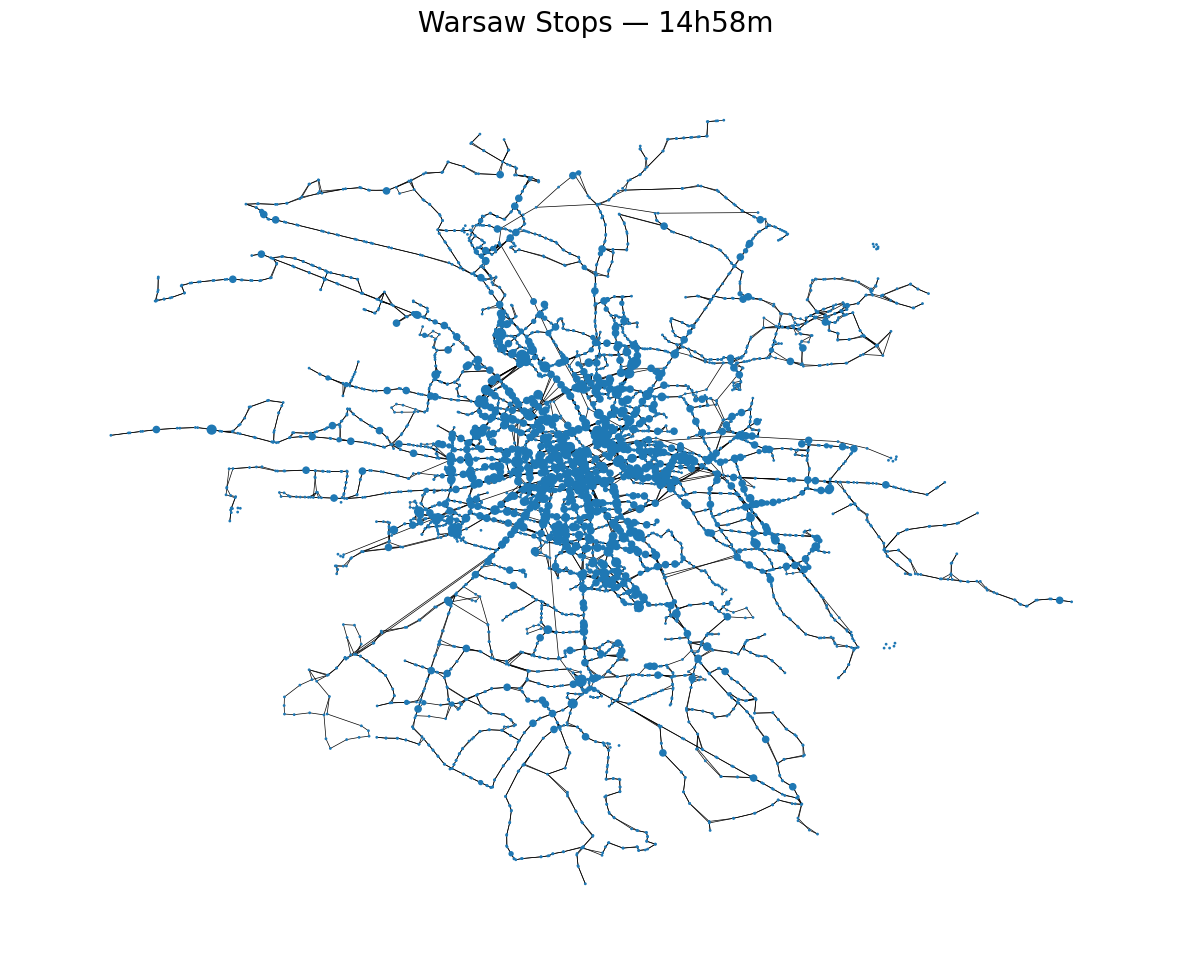

899


In [528]:
from IPython.display import display, clear_output
import math

stopLabels_dict = dict(zip(stopLabels, stopNames))
fig, ax = plt.subplots(figsize=(15,12))


pos = {row['stop_id']: (row['stop_lon'], row['stop_lat']) for _, row in stops.iterrows()}

for i in range(500,900):
    try:
        nodeWeights = dict(grouped.loc[i])
    except KeyError:
        nodeWeights = {}       

    node_sizes = []
    for n in G.nodes():
        if n in nodeWeights:
            node_sizes.append(nodeWeights[n] * 4)  
        else:
            node_sizes.append(1)


    clear_output(wait=True)
    display(fig)

    ax.clear()  

    nx.draw_networkx_nodes(G, pos, node_size  = node_sizes, ax=ax)
    nx.draw_networkx_edges(G, pos, width = 0.5, ax=ax)

    ax.set_title(f' Warsaw Stops — {i//60}h{i%60}m', size=20)
    ax.set_axis_off()
    print(i)
    plt.pause(0.01)